##  Medical Health Insurance Premium Cost Prediction 

### Introduction
#### This project looks into using various python machine learning and regression models to build a model capable of predicting the price of medical health insurance of a primary beneficiary
#### We are going to take the following approach:

#### 1. Aim
#### 2. About the dataset
#### 3. Data Preparation and EDA
#### 4. Data pre-processing
#### 5. Normalization
#### 6. Modeliing
#### 7. Evaluation Metrics
#### 8. Conclusion

### 1. Aim

#### The aim of this project is to predict the factors that influence the price of health insurance based on various attributes of primary beneficiaries such as age, sex, body mass index, children, smoker, and region. The dataset is taken from Kaggle and has 1338 rows and 7 columns. The dataset has 6 independent variables as predictors and 1 target (dependent) variable i.e. Charges

### 2. About the dataset

#### The dataset desribes the medical insurance premium cost of primary beneficiaries and several factors that affect how much beneficiaries pay for health insurance. The attributes in the dataset includes age, sex, BMI, children, smoker, region, and the dependent attribute which is the charges. The independent attributes provides a diverse range of variables for analysis and they include: age: Age of primary beneficiary; sex: insurance contractor gender, 'female', 'male'; BMI: Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9; children: Number of children covered by health insurance / Number of dependents; smoker: Smoking; and region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.



In [135]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [136]:
insurance = pd.read_csv("insurance.csv")

In [137]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


In [138]:
pd.set_option("display.max_rows", None)

In [139]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


### 3. Data Pre-processing and EDA

In [140]:
# checking the shape of the data

insurance.shape

(1338, 7)

In [141]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [142]:
# checking for the column headers in the data

insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [143]:
# checking data type of each column

insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [144]:
# checking for nulls or missing values

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [145]:
# checking the unique values in each column

insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [146]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [147]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

### Descriptive Statistics

In [148]:
#  Descriptive statistics

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [149]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis

##### This is to visualize the distribution of the data and try to understand the details of the data and the story it has to tell, most especially the relationship between the predictors, i.e., the independent variables and the target i.e, dependent variables

### EDA: Univariate Analysis

### Pie Chart for Sex

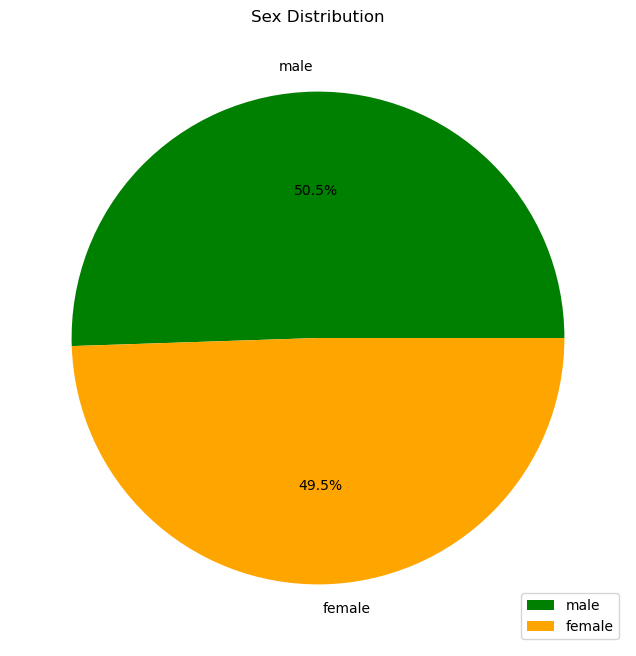

In [150]:
plt.figure(figsize = (12,8))
plt.title('Sex Distribution')
plt.pie(insurance['sex'].value_counts(), labels=['male', 'female'], colors = ['green', 'orange'], autopct='%1.1f%%')
plt.legend(loc=4)

plt.show()

# Argument named autopct converts the values in terms of percentages and plots it in the pie chart  
# www.datasciencemadesimple.com

In [151]:
insurance[insurance['sex'] == 'male'].count()

age         676
sex         676
bmi         676
children    676
smoker      676
region      676
charges     676
dtype: int64

#### The above pie chart almost shows an evenly distributed gender percentage between male and female insurance beneficiary with the Male slightly above the female with a percentage of 50.5% and 49.5% females

### Age Distribution of Primary Beneficiary

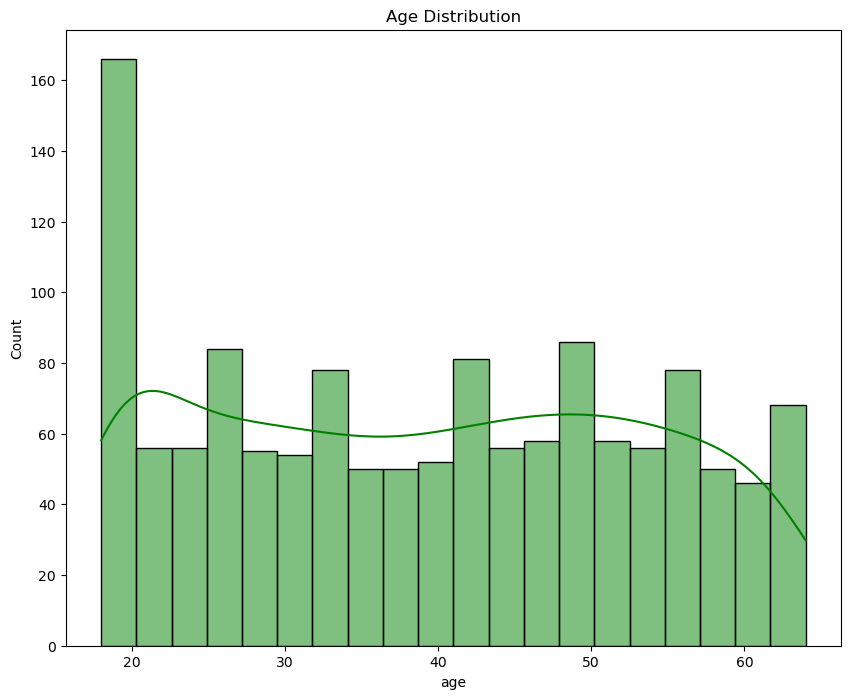

In [152]:
plt.figure(figsize = (10,8))
sns.histplot(data=insurance, x=insurance['age'], bins = 20, kde=True, color='green', edgecolor='black')
plt.title('Age Distribution')
plt.show()


# bins - the number of bins, or the breaks of the bins
# kde  - bool, If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

#### Majority  of the primary beneficiaries are in the range of 18-22 years of age, which means majority of the beneficiaries are young, while other age ranges are evenly distributed in counts between 50 - 80 til ages 64

In [153]:
insurance['age'].max()

64

### Body Mass Index BMI Distribution 

Text(0.5, 1.0, 'BMI Distribution')

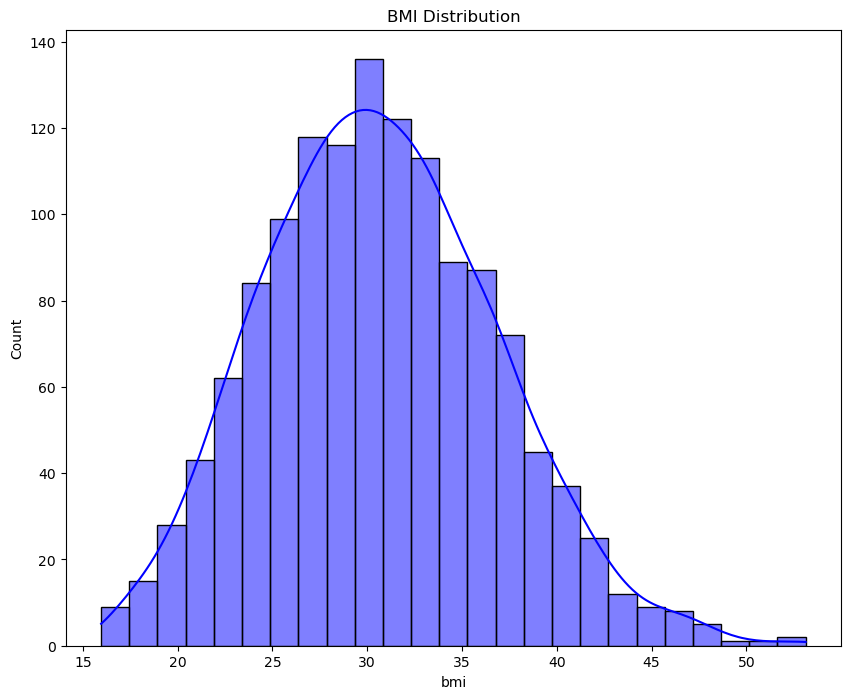

In [154]:
plt.figure(figsize = (10,8))
sns.histplot(data=insurance, x=insurance['bmi'], bins = 25, kde=True, color='blue', edgecolor='black')
plt.title('BMI Distribution')

#### The plot of BMI distribution provides an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight. Highest BMI range was between 26.0 to 33.0  

### Children

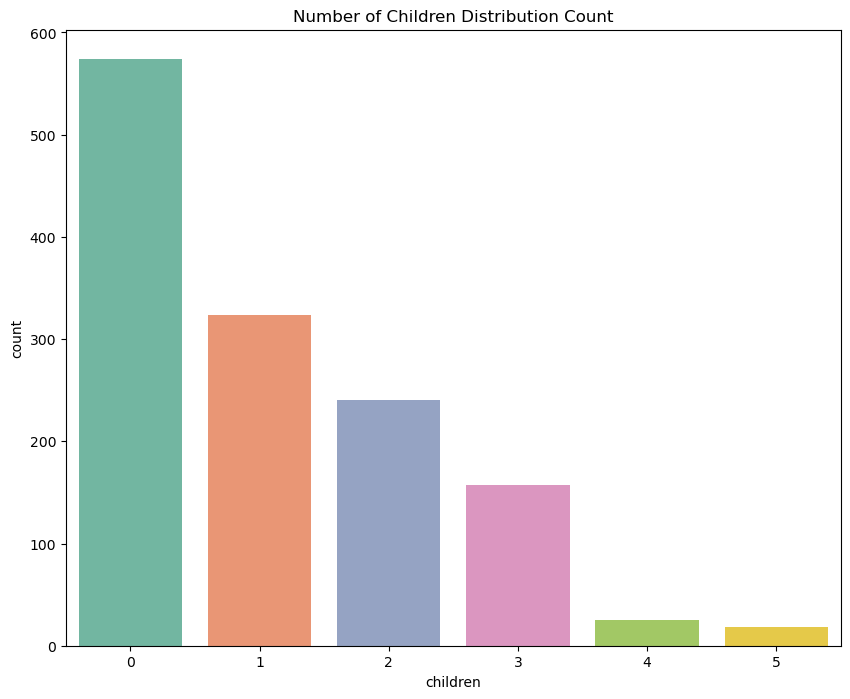

In [155]:
plt.figure(figsize = (10,8))
sns.countplot(data=insurance, x="children", palette="Set2")
plt.title("Number of Children Distribution Count")
plt.show()


#### The above counterplot shows the number of children covered by health insurance / Number of dependents and it was observed that most of the medical insurance beneficiaries had no children while the highest number of beneficiaries had just a child followed by a reasonable count of beneficiaries with 2 and 3 children

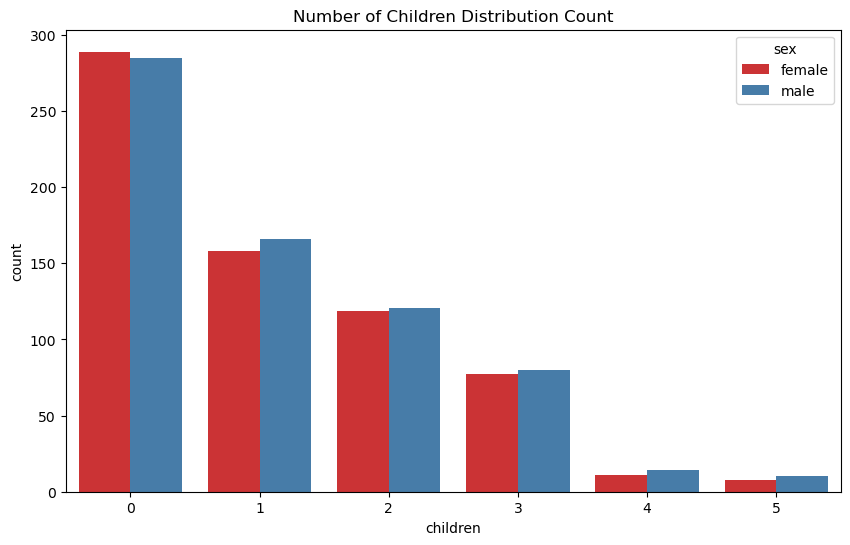

In [156]:
plt.figure(figsize = (10,6))
sns.countplot(data=insurance, x="children", hue="sex", palette="Set1")
plt.title("Number of Children Distribution Count")
plt.show()

### Smokers

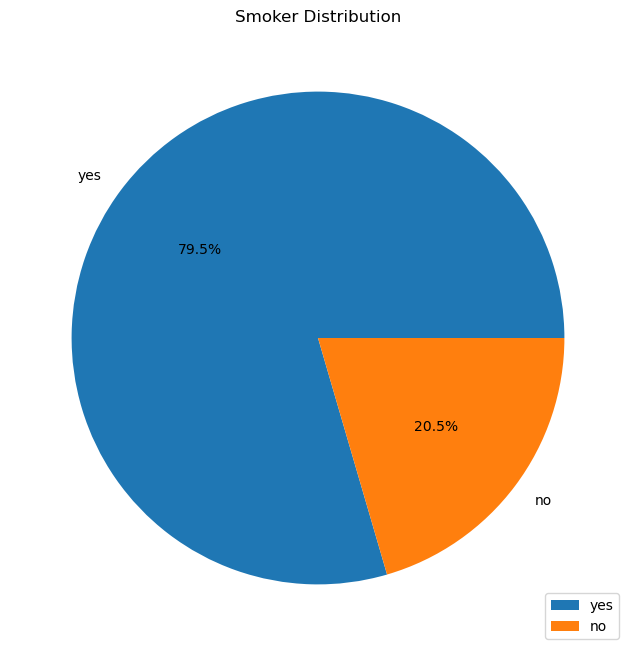

In [157]:
plt.figure(figsize=(13,8))
plt.pie(insurance['smoker'].value_counts(), labels=['yes', 'no'], autopct='%1.1f%%')
plt.title('Smoker Distribution')
plt.legend(loc=4)
plt.show()

#### This Pie chart helps to know the smokers distribution in the dataset. From this plot, it is evident that most of the insurance beneficiaries are smokers, with one-fifth being non-smokers

### Region

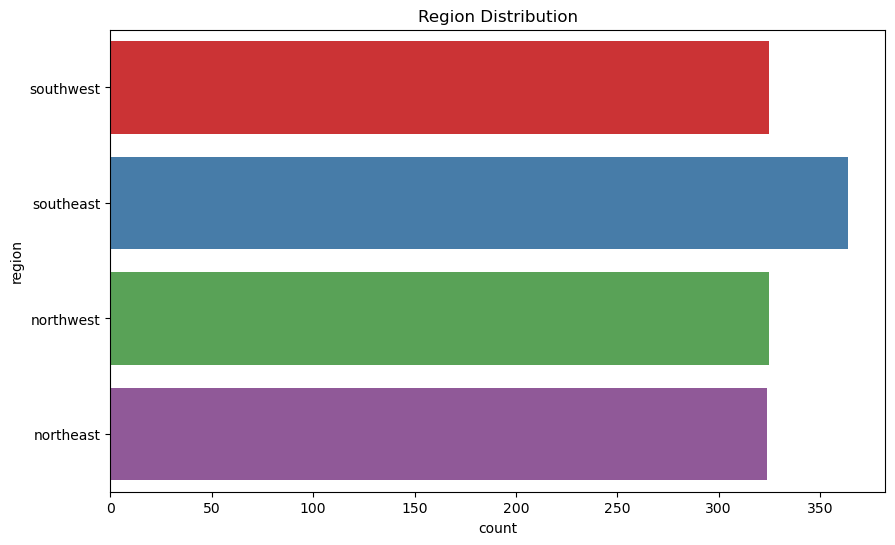

In [158]:
plt.figure(figsize = (10,6))
sns.countplot(data=insurance, y="region", palette="Set1")
plt.title('Region Distribution')
plt.show()

#### This graph shows the regional distribution of beneficiaries, i.e. the beneficiary's residential area in the US, in this insurance dataset.Beneficiaries from the southwest, northwest, and northeast almost at an equal count but less than the dominant southeast region

#### From all the above, pit plot, histogram chart, bar and count plot, there is an understanding of the insurance dataset in this case study, speaking of its columnal distribution. Next, is to explore the variations of these independent variables with the target variable, i.e., Charges

### EDA: Bivariate Analysis:  Independent and Dependent Variables

In [159]:
#Age and Charges

Text(0.5, 1.0, 'Age vs Charges')

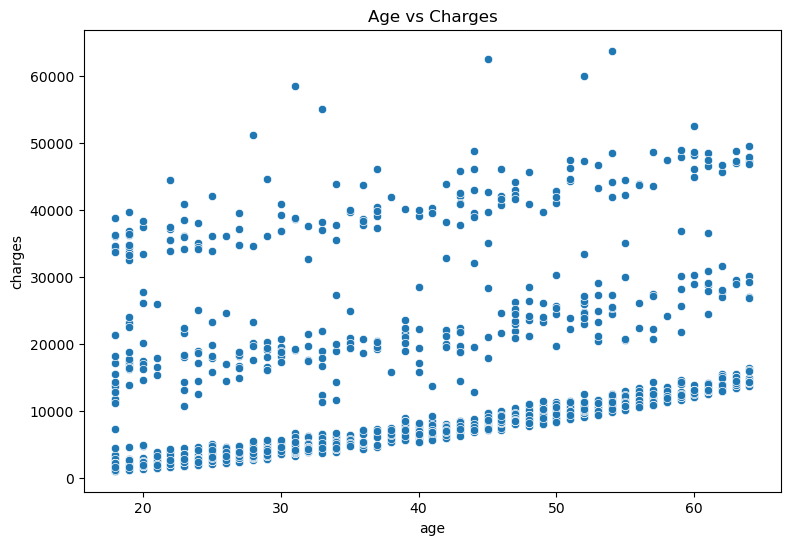

In [160]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='age',y='charges', data=insurance)
plt.title('Age vs Charges')

#### Here, in this scatterplot, there is a positive trend showing that the charges of a beneficiary most likely increases with age, which is evident as beneficiary's age increases from 20 to above 60 across the dataset, Also, there are multiple possible charge amounts in the same age cluster showing that there are other factors which decides the insurance charges of beneficiaries, Also obvious that 712 beneficiaries have insurance charges below 10000

In [161]:
insurance[insurance['charges'] <10000.00]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
10,25,male,26.220,0,no,northeast,2721.320800
12,23,male,34.400,0,no,southwest,1826.843000
15,19,male,24.600,1,no,southwest,1837.237000


#### Charge vs Body Mass Index

Text(0.5, 1.0, 'bmi vs Charges')

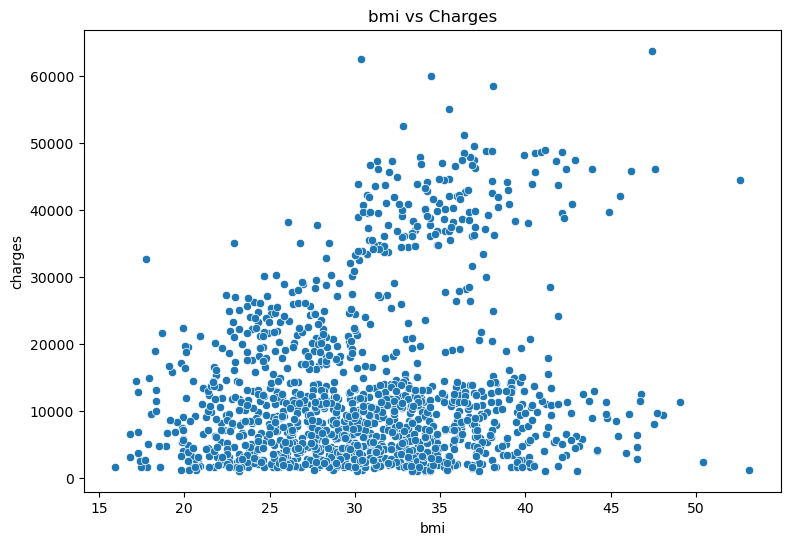

In [162]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='bmi',y='charges', data=insurance)
plt.title('bmi vs Charges')

### Sex and Charges

Text(0.5, 1.0, 'Charges vs Sex')

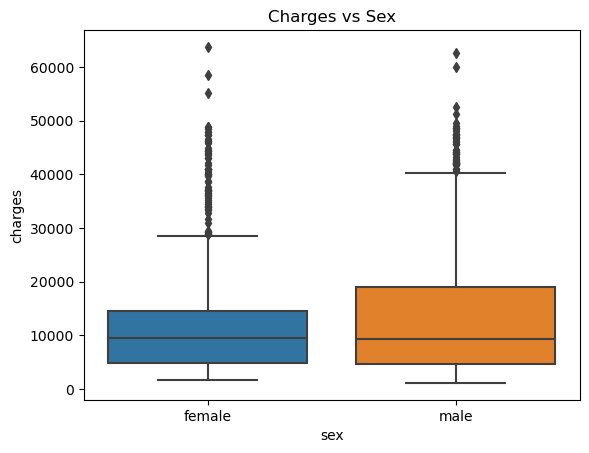

In [163]:
sns.boxplot(x= 'sex', y='charges', data=insurance).set_title('Charges vs Sex')

#### The box plot describes the insurance charges distribution among both male and female gender. The beneficiaries from the male gender has its maximum charges and outliers above 40000, and 75th percentile of its total at around 20000 while the female sex has its maximum around 28000 and its 75th percentile around 15000 while both sexex had their median charge around 10000

##### Note that boxplot, also known as a box plot, box plots or box-and-whisker plot, is a standardized way of displaying the distribution of a data set based on its five-number summary of data points: the “minimum,” first quartile [Q1], median, third quartile [Q3] and “maximum.”  A boxplot may help when you need more information from a data set/distribution than just the measures of central tendency (mean, median and mode)

### Charges vs Smoker

Text(0.5, 1.0, 'Charges vs Smoker')

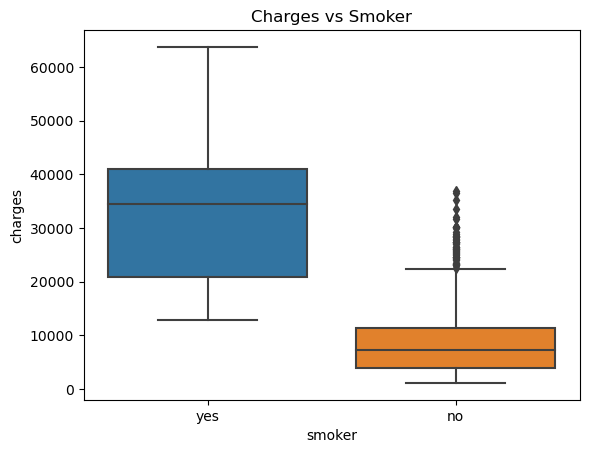

In [164]:
sns.boxplot(x= 'smoker', y='charges', data=insurance).set_title('Charges vs Smoker')

### Region and Charges

Text(0.5, 1.0, 'Charges vs Region')

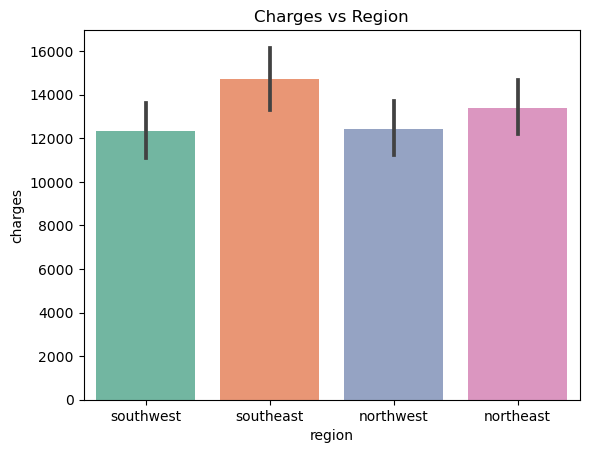

In [165]:
sns.barplot(x='region', y='charges', data=insurance, palette='Set2').set_title('Charges vs Region')


#### In line with the earlier region distribution bar countplot, the southeast region showed a higher charge rate of beneficiaries than other regions. Therefore, the hypothesis seems to be true that beneficiaries in the south east region would have more medical insurance charge than other regions

### Which Factors Influence the Price of Health Insurance?


### 4. Data Preprocessing 

#### Encoding Categorical Variables for Machine Learning such that values take on the value of labels

In [166]:
insurance['sex'] = insurance['sex'].astype("category")
insurance['sex'] = insurance['sex'].cat.codes

insurance['smoker'] = insurance['smoker'].astype("category")
insurance['smoker'] = insurance['smoker'].cat.codes

insurance['region'] = insurance['region'].astype("category")
insurance['region'] = insurance['region'].cat.codes

In [167]:
#from sklearn.preprocessing import LabelEncoder
#col_features = [["sex", "smoker", "region"]]
#label = LabelEncoder()
#for col_features in col_features:
    #label.fit(insurance[col_features].unique())
    #insurance[col_features] = label.transform(insurance[col_features])
    #print(col_features, insurance[col_features].unique())

In [168]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924000
1,18,1,33.770,1,0,2,1725.552300
2,28,1,33.000,3,0,2,4449.462000
3,33,1,22.705,0,0,1,21984.470610
4,32,1,28.880,0,0,1,3866.855200
5,31,0,25.740,0,0,2,3756.621600
6,46,0,33.440,1,0,2,8240.589600
7,37,0,27.740,3,0,1,7281.505600
8,37,1,29.830,2,0,0,6406.410700
9,60,0,25.840,0,0,1,28923.136920


### 5. Normalization

#### Normalizing the continuous variables to transfrom features to be on a similar scale using StandardScaler and this improves the performance and training stability of the model (this is done by calling out the numerical attributes with int and float data type and re-assigning them back to the columns)

In [169]:
from sklearn.preprocessing import StandardScaler 

In [170]:
scaler = StandardScaler()
insurance[["age", "bmi", "children", "charges"]] = scaler.fit_transform(insurance[["age", "bmi", "children", "charges"]])

In [171]:
insurance.head(50)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,0.298584
1,-1.509965,1,0.509621,-0.078767,0,2,-0.953689
2,-0.797954,1,0.383307,1.580926,0,2,-0.728675
3,-0.441948,1,-1.305531,-0.908614,0,1,0.719843
4,-0.513149,1,-0.292556,-0.908614,0,1,-0.776802
5,-0.584350,0,-0.807656,-0.908614,0,2,-0.785908
6,0.483668,0,0.455486,-0.078767,0,2,-0.415500
7,-0.157143,0,-0.479567,1.580926,0,1,-0.494728
8,-0.157143,1,-0.136714,0.751079,0,0,-0.567017
9,1.480485,0,-0.791252,-0.908614,0,1,1.293027


### EDA Multivariate Analysis:  Correlation Matrix Heatmap

In [172]:
# correlation amongst attributes

insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [173]:
insurance.corr()["charges"]

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

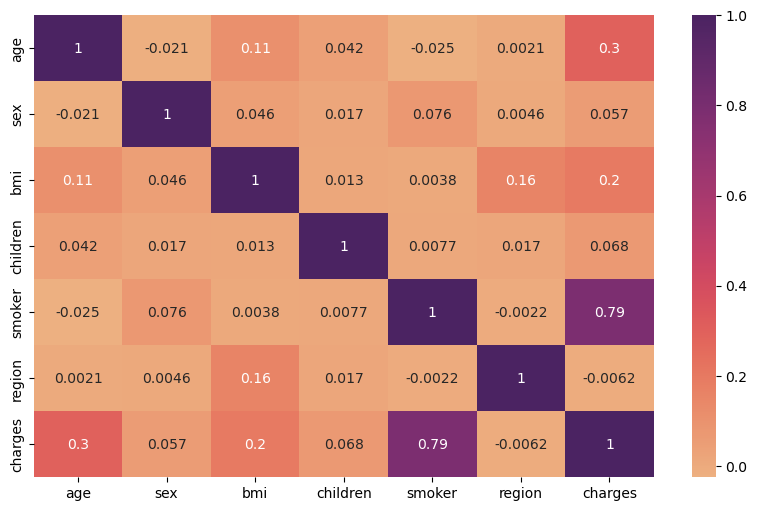

In [202]:
# Correlation heatmap

plt.figure(figsize =(10,6))
sns.heatmap(insurance.corr(), annot=True, cmap='flare')


#### In this correlation matrix, there is one main correlations namely:  charges and smoker. Colors for the matrix can be found here: https://seaborn.pydata.org/tutorial/color_palettes.html

### 6. Modeling

#### In this section we will be using and evaluating some models to see the best model for predicting the medical insurance charge in our dataset.

### Train Test Split

In [175]:
x = insurance.drop('charges', axis =1)          # predictors
y = insurance['charges']                        # target

In [176]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 0)

### charges prediction

### I will be using the following models:
#### A. Linear Regression Model
#### B. Decision Tree Regressor
#### C. Random Forest Regressor

###  7. Regression Model Evaluation Metrics


####  1. R^2  Coefficient of Determination         
####  2. Mean Absolute Error MAE           
####  3. Mean Squared Error MSE

In [177]:
# A.  LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [178]:
# model fitting

model.fit(x_train, y_train)

LinearRegression()

In [179]:
model.predict(x_train)

array([ 1.66187212, -0.79757172,  1.438048  , ..., -0.58962827,
       -0.72291603, -0.90017237])

In [180]:
model.predict(x_test)

array([-0.18612982, -0.2877119 ,  2.04240969,  0.2356251 , -0.5237017 ,
       -0.76836259, -0.96804366,  0.08366347, -0.35661466, -0.48230011,
       -0.72081751, -0.24973365, -0.38109293, -0.75537862,  1.20118234,
       -0.18428218, -0.16678196, -0.59802744, -0.42105126,  1.13741995,
        1.67753925,  0.08233161, -0.13096535,  1.58081383, -0.73155026,
       -0.34070097, -1.00306209, -0.26279616, -0.75854809, -0.24067681,
       -0.35588675,  2.22831749,  0.18235505,  0.03277135,  0.9475952 ,
       -0.67245265, -0.03531756,  1.42546784,  1.66523632, -0.80808722,
       -0.7656253 , -0.74283806,  1.42009545,  2.15429163,  1.21704715,
       -0.68294907, -0.19323455, -0.45367347, -0.79816099, -0.22411854,
       -0.63118796, -0.81711692,  1.61722017,  2.07249546,  0.24662026,
       -0.51282639, -0.60286218, -0.31989908, -0.33147098, -0.13012673,
       -0.95586886,  2.1099323 ,  0.15780961, -0.13446803,  0.05857994,
        0.04719226,  1.05697178,  1.55486059, -0.99949755, -0.26

In [181]:
model.score(x_test,y_test)

0.7998747145449959

In [182]:
#  B.  DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

tree_model = DecisionTreeRegressor(min_samples_split=4, max_depth = 10, max_features = 'auto', max_leaf_nodes=10)
tree_model

DecisionTreeRegressor(max_depth=10, max_features='auto', max_leaf_nodes=10,
                      min_samples_split=4)

In [183]:
# Model fitting of the training data

tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', max_leaf_nodes=10,
                      min_samples_split=4)

In [184]:
# Training accuracy

tree_model.score(x_train, y_train)

0.8518233029057756

In [185]:
#tree_model.score(x_test, y_test)

### more findings., likely outta

In [186]:
# predicting the insurance charge of a beneficiary

charge_pred = tree_model.predict(x_test)

###  Evaluating the Decision Tree Regressor Model

In [187]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': charge_pred})

df.reset_index(drop = True, inplace = True)

df.head(10)

,Actual,Predicted
0,-0.292916,-0.039939
1,-0.390131,-0.236136
2,2.679083,2.675310
3,-0.026463,0.149646
4,-0.299548,-0.236136
5,-0.724472,-0.573899
6,-0.914646,-0.823675
7,-0.151475,-0.236136
8,-0.473608,-0.573899
9,-0.648086,-0.573899


##### Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Distplot depicts the data by a histogram and a line in combination to it. The seaborn.distplot ('data') function is used to plot the distplot.      The Seaborn Distplot can also be clubbed along with the Kernel Density Estimate Plot to estimate the probability of distribution of continuous variables across various data values.

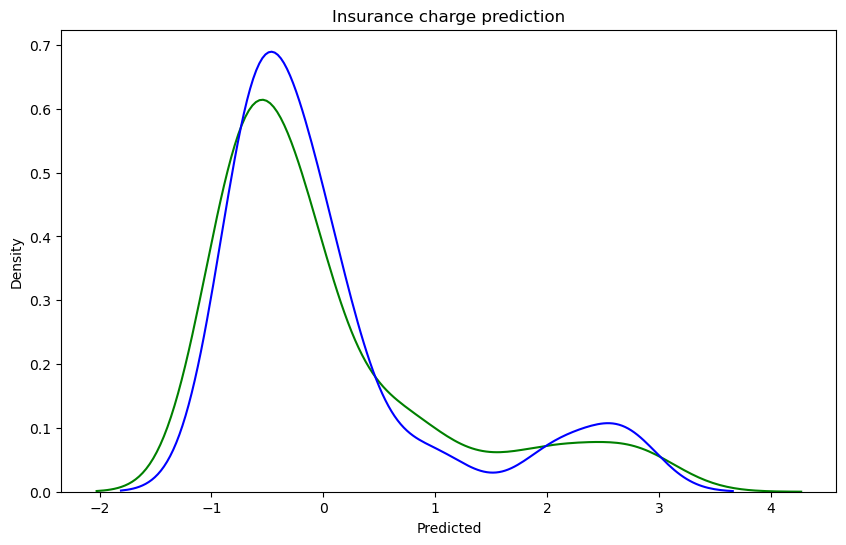

In [188]:
plt.figure( figsize= (10,6))

sns.distplot(df['Actual'], kde = True, color = 'green', hist = False, rug = False)
sns.distplot(df['Predicted'], kde = True, color = 'blue', hist = False, rug = False)
plt.title("Insurance charge prediction")
plt.show()

#### The green shows the distribution count for the actual values and the blue line shows the distribution count for predicted values. The predicted vaalues are similar and seem close to the actual values and their curve coincides with the actual value curve. This suggests that the model is a good fit.

In [189]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [190]:
print("R2 score : ", r2_score(y_test, charge_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, charge_pred))
print("Mean Absolute Error : ", mean_absolute_error(y_test, charge_pred))

R2 score :  0.8820688651563906
Mean Squared Error :  0.12806075313922322
Mean Absolute Error :  0.2198589545667073


In [191]:
# C.   RANDOM FOREST REGRESSOR

#### The random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and also control over-fitting. 

In [192]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [193]:
# model training

rf.fit(x_train,y_train)

RandomForestRegressor()

In [194]:
# model training accuracy

rf.score(x_train, y_train)

0.9742869853773491

In [195]:
# Let's predict the insurance charge of a beneficiary

crf_pred = rf.predict(x_test)

###  Evaluating the Random Forest Regressor Model

In [196]:
dfrf = pd.DataFrame({'Actual': y_test, 'Predicted': crf_pred})
dfrf.reset_index(drop = True, inplace = True)
dfrf.head(10)

,Actual,Predicted
0,-0.292916,-0.086325
1,-0.390131,-0.282306
2,2.679083,2.553795
3,-0.026463,-0.004265
4,-0.299548,-0.238660
5,-0.724472,-0.178328
6,-0.914646,-0.917468
7,-0.151475,-0.039279
8,-0.473608,-0.466428
9,-0.648086,-0.616601


<AxesSubplot:title={'center':'Insurance Charge Prediction'}, xlabel='Predicted', ylabel='Density'>

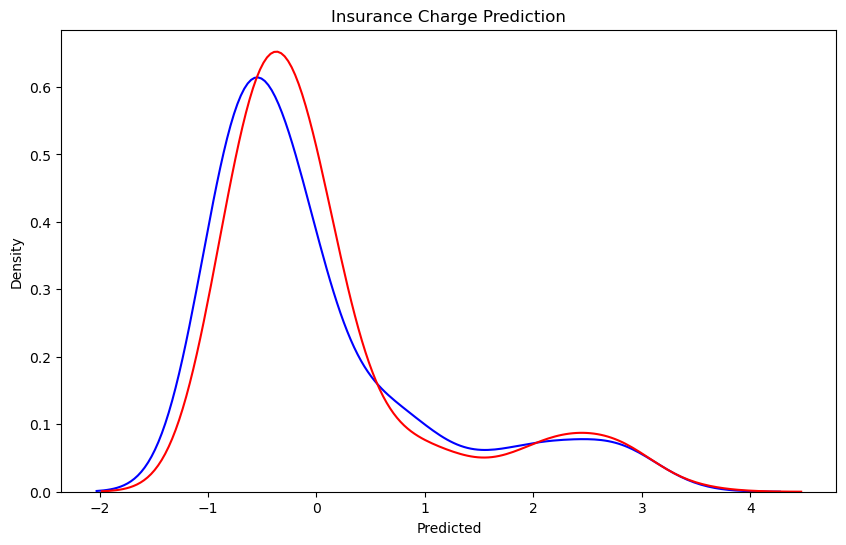

In [197]:
plt.figure(figsize = (10,6))
plt.title('Insurance Charge Prediction')

sns.distplot (dfrf['Actual'], kde = True, color = 'blue', hist = False)
sns.distplot (dfrf['Predicted'], kde = True, color = 'red', hist = False)

#### The blue line shows the distribution of the actual values of medical insurance charge and the red line shows the distibution count for the predicted values. The predicted values are close to the actual values and the curve coincides with the actual value curve showing that the model is a good fit.

In [198]:
print("R2 Score: ", r2_score(y_test, crf_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, crf_pred))
print("Mean Absolute Error :", mean_absolute_error(y_test, crf_pred))

R2 Score:  0.8757062292807082
Mean Squared Error :  0.13496990349439505
Mean Absolute Error : 0.21965044102759546


### 8. Conclusion

#### From this exploratory data analysis, I tried to analyze the factors influencing the charges of medical insurance. Various statistical and visual techniques were employed to analyze the relationships between variables, identify patterns, and assess the relevance of features. The charges of medical insurance for a primary beneficiary is dependent largely on         
#### 1. Smoker staus either 'YES' or 'NO' 
#### 2. Age 
#### 3. BMI

#### Smoking is the greatest factor that affects medical cost charges, then it's age and BMI



#### The medical insurance cost i.e., charge greatly increases with a beneficiary being a smoker as opposed not being a smoker as shown in the boxplot earlier, also, charges increase as age of beneficiary tends to increase. These 2 main factors increasingly affect how much health insurance premium costs per primary beneficiary

#### As regards the machine learning ML models, I used the Linear regression model and the regressor models - Decision Tree Regressor and Random Forest Regressor for predicting medical insurance charge.

#### The Random Forest Regressor did good with the accuracy of 87.7% and Decision Tree Regressor had an accuracy of 88.2%